<a href="https://colab.research.google.com/github/AmartyaCodes/Unsupervised-WBC-Segmentation/blob/main/UnsupervisedCellSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

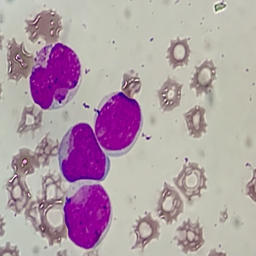

In [ ]:
image = cv2.imread('/content/IMG_2838.jpg')
cv2_imshow(image)

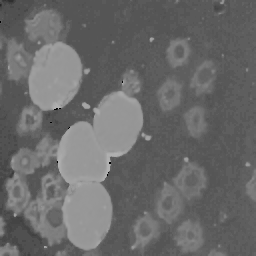

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv_image)
cv2_imshow(h)

In [ ]:
h.shape

(256, 256)

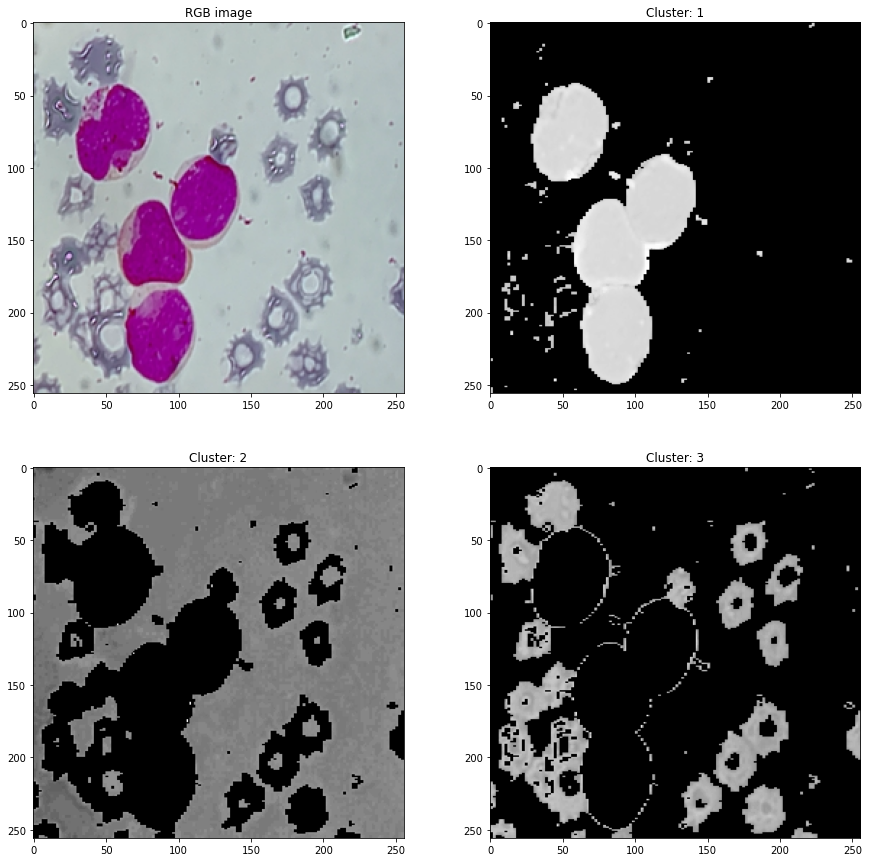

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pixel_values = h.reshape((-1, 2))
pixel_values_new = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values_new, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2, 2, 1)
plt.title("RGB image")

plt.imshow(image,)
for i1 in range(0,3):
  cluster1 = i1
  cluster2 = (i1+1) %3
  masked_image= np.copy(h)
  masked_image = masked_image.reshape((-1, 2))
  masked_image[labels == cluster1] = [0, 0]
  masked_image[labels == cluster2] = [0, 0]
  masked_image = masked_image.reshape(h.shape)
  # masked_image = cv2.cvtColor(masked_image, cv2.COLOR_GRAY2RGB)
  # x,y,z = image.shape
  # for i in range(0,x):
  #   for j in range(0,y):
  #     if masked_image[i][j][0] !=0 and masked_image[i][j][1] !=0 and masked_image[i][j][2] !=0 :
  #       masked_image[i][j][0] = image[i][j][0]
  #       masked_image[i][j][1] = image[i][j][1]
  #       masked_image[i][j][2] = image[i][j][2]



  
  fig.add_subplot(2, 2, i1+2)

  plt.title("Cluster: " + str(i1+1))
  plt.imshow(masked_image,cmap = 'gray')

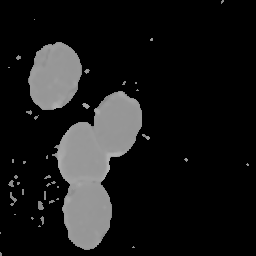

In [ ]:
cluster1 =0
cluster2 = 1
masked_image= np.copy(h)
masked_image = masked_image.reshape((-1, 2))
masked_image[labels == cluster1] = [0, 0]
masked_image[labels == cluster2] = [0, 0]
masked_image = masked_image.reshape(h.shape)
median_blur_image=cv2.medianBlur(masked_image, 3)
cv2_imshow(median_blur_image)

In [ ]:
median_blur_image.shape[1]

256

In [ ]:
np.unique(median_blur_image)

array([  0, 120, 123, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177], dtype=uint8)

In [ ]:
median_blur_image1 = median_blur_image

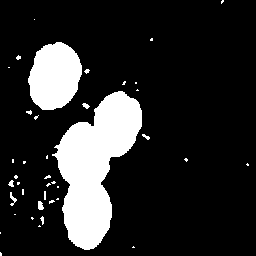

In [ ]:
for i in range (median_blur_image1.shape[0]):
  for j in range(median_blur_image1.shape[1]):
    if median_blur_image1[i][j] >0:
      median_blur_image1[i][j]= 255
    else:
      median_blur_image1[i][j]=0
cv2_imshow(median_blur_image1) 

In [ ]:
image2 = cv2.resize(image,(256,256))
image2.shape

(256, 256, 3)

In [ ]:
median_blur_image1 = cv2.cvtColor(median_blur_image,cv2.COLOR_GRAY2RGB)

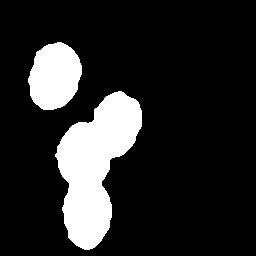

In [ ]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
median_blur_image1  = cv2.morphologyEx(median_blur_image1, cv2.MORPH_OPEN, kernel1)
median_blur_image1  = cv2.morphologyEx(median_blur_image1, cv2.MORPH_CLOSE, kernel2)
cv2_imshow(median_blur_image1)

In [ ]:
for i in range (median_blur_image1.shape[0]):
  for j in range(median_blur_image1.shape[1]):
    for k in range(median_blur_image1.shape[2]):
      if median_blur_image1[i][j][k] ==255:
        median_blur_image1[i][j][k]= image[i][j][k]
      else:
        median_blur_image1[i][j][k]=0


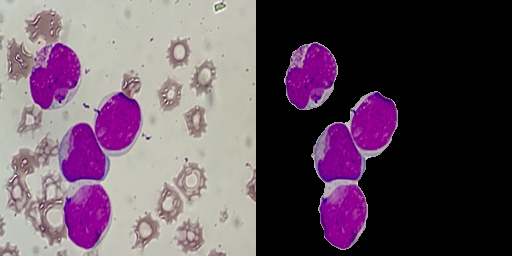

In [ ]:
cv2_imshow(np.hstack((image,median_blur_image1)))